In [1]:
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv("c:/Users/REVAN/Downloads/covid19 death dataset/us-counties.csv") #sesuaikan dengan lokasi penyimpanan file csvnya

In [4]:
df.head()

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5545 entries, 0 to 5544
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 5545 non-null   object 
 1   geoid                5545 non-null   object 
 2   county               5545 non-null   object 
 3   state                5545 non-null   object 
 4   cases                5545 non-null   int64  
 5   cases_avg            5545 non-null   float64
 6   cases_avg_per_100k   5484 non-null   float64
 7   deaths               5545 non-null   int64  
 8   deaths_avg           5545 non-null   float64
 9   deaths_avg_per_100k  5484 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 433.3+ KB


In [6]:
df.describe()

,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
count,5545.000000,5545.000000,5484.000000,5545.000000,5545.000000,5484.000000
mean,2.910189,1.269032,0.362270,0.045807,0.022972,0.005939
std,33.478831,10.660697,0.811841,0.483935,0.218094,0.056005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.140000,0.040000,0.000000,0.000000,0.000000
50%,0.000000,0.290000,0.140000,0.000000,0.000000,0.000000
75%,1.000000,0.570000,0.350000,0.000000,0.000000,0.000000
max,1942.000000,609.140000,13.790000,23.000000,7.710000,2.360000


In [7]:
df.deaths.value_counts()

deaths
0     5407
1       98
2       21
4        7
3        5
6        2
5        1
10       1
14       1
7        1
23       1
Name: count, dtype: int64

In [8]:
df.isnull().sum()

date                    0
geoid                   0
county                  0
state                   0
cases                   0
cases_avg               0
cases_avg_per_100k     61
deaths                  0
deaths_avg              0
deaths_avg_per_100k    61
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
DS = df.drop(columns=['state', 'date', 'geoid', 'county', 'cases_avg_per_100k', 'deaths_avg_per_100k'])
DS.head()

,cases,cases_avg,deaths,deaths_avg
0,1,0.14,0,0.0
1,0,0.14,0,0.0
2,0,0.14,0,0.0
3,0,0.14,0,0.0
4,1,0.14,0,0.0


In [11]:
nilai_x = [ 'cases', 'cases_avg','deaths_avg']
x = DS[nilai_x]
y = DS['deaths']

In [12]:

skala = StandardScaler()
data_transform = skala.fit_transform(x.to_numpy())  
data_transform = pd.DataFrame(data_transform, columns = x.columns)


In [13]:
x_training, x_testing, y_training, y_testing = train_test_split(data_transform, y, test_size= 0.2, random_state = 5)

In [14]:
model_training = linear_model.LogisticRegression()
model_training.fit(x_training, y_training)

LogisticRegression()

In [15]:
y_predict = model_training.predict(x_testing)
accuracy = accuracy_score(y_testing, y_predict)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_testing, y_predict, average='weighted')  
print(f"Precision: {precision}")
recall = recall_score(y_testing, y_predict, average='weighted') 
print(f"Recall: {recall}") 
f1 = f1_score(y_testing, y_predict, average='weighted')
print(f"F1-score: {f1}")

Accuracy: 0.9828674481514879
Precision: 0.9830767306477047
Recall: 0.9828674481514879
F1-score: 0.9771491861934937


c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<function matplotlib.pyplot.show(close=None, block=None)>

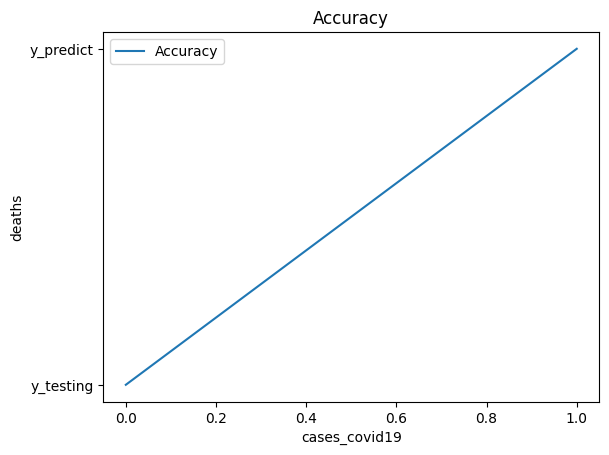

In [17]:
plt.plot(['y_testing', 'y_predict'])
plt.legend(['Accuracy'], loc = 'upper left')
plt.title('Accuracy')
plt.xlabel('cases_covid19')
plt.ylabel('deaths')
plt.show